###Importing necessary Libraries


In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

###Data Loading

Mounting google drive

In [316]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading dataset

In [317]:
df = pd.read_csv('/content/drive/MyDrive/EDA Projects/Electric_Vehicle_Population_Data.csv')

In [318]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


# Basic Analysis

In [319]:
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,191403.000000,191407.000000,191407.000000,191407.000000,190993.000000,1.914070e+05,1.914030e+05
mean,98177.823603,2020.732335,55.657442,994.773258,29.016880,2.237202e+08,5.297759e+10
std,2392.808886,2.990487,90.151930,8050.523372,14.909417,7.398058e+07,1.573588e+09
min,1731.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,17.000000,1.861622e+08,5.303301e+10
50%,98125.000000,2022.000000,0.000000,0.000000,33.000000,2.328176e+08,5.303303e+10
75%,98371.000000,2023.000000,72.000000,0.000000,42.000000,2.589708e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [320]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

checking null values

In [321]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 414
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

Check Zero values in numerical columns

In [322]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
print("\nNumerical columns:")
print(numerical_cols)


Numerical columns:
Index(['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', '2020 Census Tract'],
      dtype='object')


In [323]:
# Count the number of 0 entries in each numerical column using lambda function
zero_counts = df[numerical_cols].apply(lambda x: (x == 0).sum())
print("\nCount of 0 entries in each numerical column:")
print(zero_counts)


Count of 0 entries in each numerical column:
Postal Code                  0
Model Year                   0
Electric Range          102133
Base MSRP               188069
Legislative District         0
DOL Vehicle ID               0
2020 Census Tract            0
dtype: int64


We can see a lots of zero count in our dataset which will create problems in future.

Check Cetegorcial missing values

In [324]:
# Check Cetegorical missing values
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
print(categorical_cols)
# Count the number of missing (NaN) entries in each categorical column
missing_counts = df[categorical_cols].apply(lambda x: x.isnull().sum())
print("\nCount of missing (NaN) entries in each categorical column:")
print(missing_counts)



Categorical columns:
Index(['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location',
       'Electric Utility'],
      dtype='object')

Count of missing (NaN) entries in each categorical column:
VIN (1-10)                                           0
County                                               4
City                                                 4
State                                                0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Vehicle Location                                     8
Electric Utility                                     4
dtype: int64


Checking unique values in our dataset

In [325]:
# Check unique values for all features
for col in df.columns:
    unique_value_counts = df[col].value_counts()
    print(f"\nUnique value counts for '{col}':")
    print(unique_value_counts)


Unique value counts for 'VIN (1-10)':
VIN (1-10)
7SAYGDEE6P    1236
7SAYGDEE7P    1220
7SAYGDEE8P    1187
7SAYGDEE5P    1184
7SAYGDEEXP    1175
              ... 
KMHC75LD6K       1
1G1RB6S5XK       1
YV4BR00Z5N       1
JN1DF0BB4R       1
3MW5P7J05M       1
Name: count, Length: 11487, dtype: int64

Unique value counts for 'County':
County
King          99076
Snohomish     22643
Pierce        14932
Clark         11335
Thurston       6969
              ...  
New York          1
Miami-Dade        1
Mobile            1
Beaufort          1
Pitt              1
Name: count, Length: 197, dtype: int64

Unique value counts for 'City':
City
Seattle                    31436
Bellevue                    9582
Redmond                     6883
Vancouver                   6744
Bothell                     6278
                           ...  
Holloman Air Force Base        1
Rosamond                       1
Newbury Park                   1
Saratoga Springs               1
Fremont                        

Checking duplicate values

In [326]:
# Check for duplicate rows
duplicates = df.duplicated()
duplicate_count = duplicates.sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


# Data Preprossessing

Dropping unnecessary features.
features like - 'VIN (1-10), Dol Vehicle ID has too many unique values. we don't need them.

In [327]:
# Drop two columns vin and dol vehicle id

df = df.drop(['VIN (1-10)', 'DOL Vehicle ID'], axis=1)


Drop electric range and base msrp for lots of 0 values

In [328]:
# Dropping electric range and base msrp for lots of 0 values
df = df.drop(['Electric Range', 'Base MSRP'], axis=1)

Dropping postal code, Legislative location, vehicle location and 2020 census tract features as it has low impact on our goal.

In [329]:
# prompt: Drop  postal code, Legislative location, vehicle location and 2020 census tract features

# Dropping postal code, Legislative location, vehicle location and 2020 census tract features
df = df.drop(['Postal Code', 'Legislative District', 'Vehicle Location', '2020 Census Tract'], axis=1)


In [330]:
df.columns

Index(['County', 'City', 'State', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Electric Utility'],
      dtype='object')

In [331]:
# prompt: lower case conversion for all the categorical features columns

# Convert all categorical columns to lowercase
for col in df.select_dtypes(include=['object']).columns:
  df[col] = df[col].str.lower()
df.head()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility
0,king,seattle,wa,2019,tesla,model s,battery electric vehicle (bev),clean alternative fuel vehicle eligible,city of seattle - (wa)|city of tacoma - (wa)
1,yakima,zillah,wa,2024,bmw,330e,plug-in hybrid electric vehicle (phev),not eligible due to low battery range,pacificorp
2,king,kent,wa,2015,nissan,leaf,battery electric vehicle (bev),clean alternative fuel vehicle eligible,puget sound energy inc||city of tacoma - (wa)
3,snohomish,bothell,wa,2015,tesla,model s,battery electric vehicle (bev),clean alternative fuel vehicle eligible,puget sound energy inc
4,yakima,yakima,wa,2022,toyota,rav4 prime,plug-in hybrid electric vehicle (phev),clean alternative fuel vehicle eligible,pacificorp


In [332]:
df.columns

Index(['County', 'City', 'State', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
       'Electric Utility'],
      dtype='object')

Now dropping the rows with missing values as the missing values rows are too low (total 4)

In [333]:
df.shape

(191407, 9)

In [334]:
df.dropna(subset=['County', 'City', 'Electric Utility'])

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility
0,king,seattle,wa,2019,tesla,model s,battery electric vehicle (bev),clean alternative fuel vehicle eligible,city of seattle - (wa)|city of tacoma - (wa)
1,yakima,zillah,wa,2024,bmw,330e,plug-in hybrid electric vehicle (phev),not eligible due to low battery range,pacificorp
2,king,kent,wa,2015,nissan,leaf,battery electric vehicle (bev),clean alternative fuel vehicle eligible,puget sound energy inc||city of tacoma - (wa)
3,snohomish,bothell,wa,2015,tesla,model s,battery electric vehicle (bev),clean alternative fuel vehicle eligible,puget sound energy inc
4,yakima,yakima,wa,2022,toyota,rav4 prime,plug-in hybrid electric vehicle (phev),clean alternative fuel vehicle eligible,pacificorp
...,...,...,...,...,...,...,...,...,...
191402,pierce,sumner,wa,2019,tesla,model 3,battery electric vehicle (bev),clean alternative fuel vehicle eligible,puget sound energy inc||city of tacoma - (wa)
191403,pierce,wilkeson,wa,2023,nissan,ariya,battery electric vehicle (bev),eligibility unknown as battery range has not b...,puget sound energy inc||city of tacoma - (wa)
191404,king,fall city,wa,2024,tesla,model y,battery electric vehicle (bev),eligibility unknown as battery range has not b...,puget sound energy inc||city of tacoma - (wa)
191405,grays harbor,aberdeen,wa,2022,tesla,model x,battery electric vehicle (bev),eligibility unknown as battery range has not b...,bonneville power administration||pud no 1 of g...


Removing lower count values from the dataset

County:

In [335]:
#  Find unique values and their counts in the 'County' column
county_counts = df['County'].value_counts()

# Display the results
print("Unique counties and their counts:")
print(county_counts)

Unique counties and their counts:
County
king          99076
snohomish     22643
pierce        14932
clark         11335
thurston       6969
              ...  
new york          1
miami-dade        1
mobile            1
beaufort          1
pitt              1
Name: count, Length: 197, dtype: int64


City:

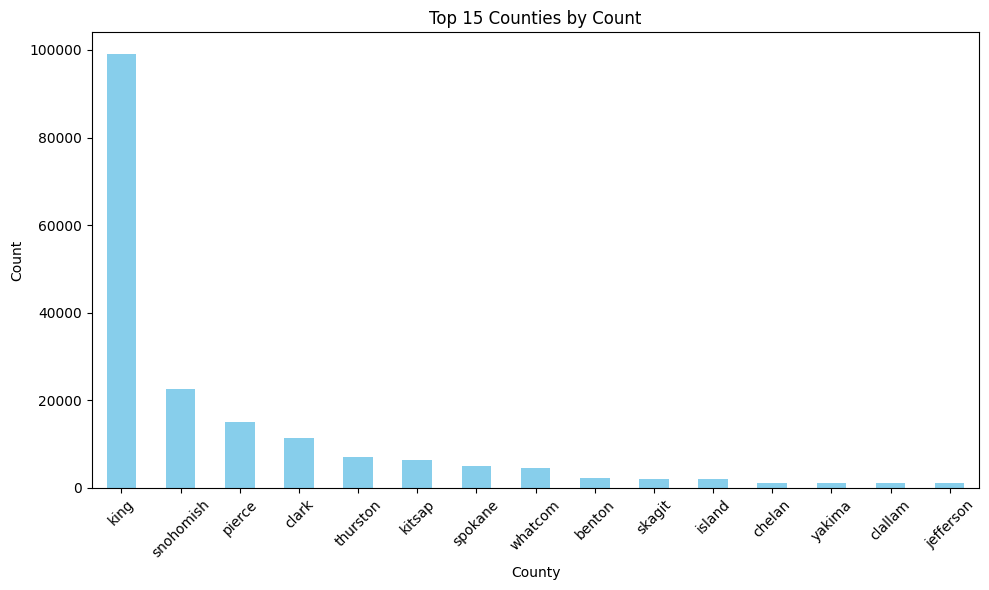

In [336]:

top_n = 15
top_counties = county_counts.head(top_n)

plt.figure(figsize=(10, 6))
top_counties.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Counties by Count')
plt.xlabel('County')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [337]:
#  Find unique values and their counts in the 'city' column
city_counts = df['City'].value_counts()

# Display the results
print("Unique cites and their counts:")
print(city_counts)

Unique cites and their counts:
City
seattle                    31436
bellevue                    9582
redmond                     6883
vancouver                   6744
bothell                     6278
                           ...  
holloman air force base        1
rosamond                       1
newbury park                   1
saratoga springs               1
fremont                        1
Name: count, Length: 743, dtype: int64


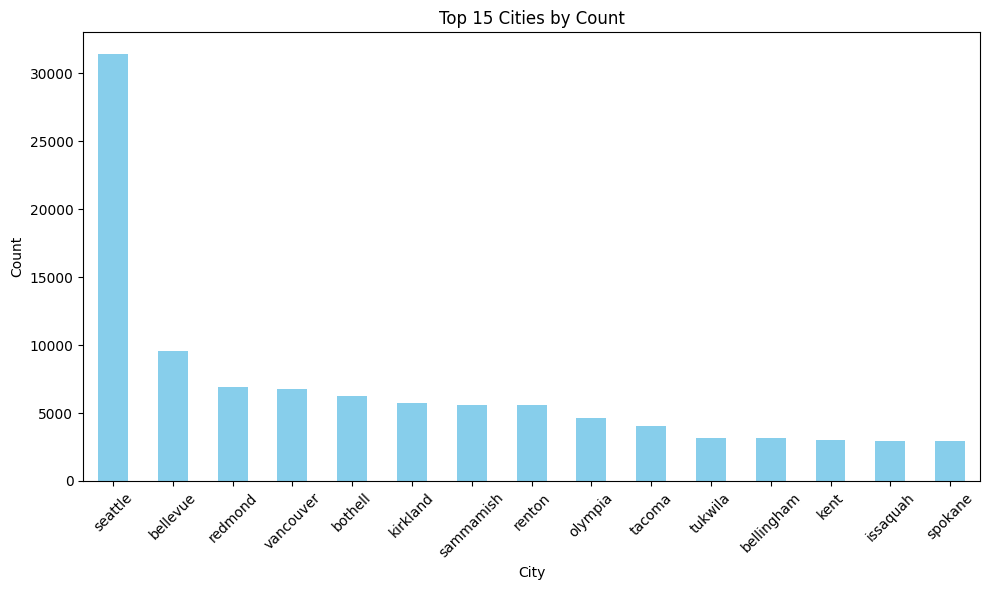

In [338]:

top_n = 15
top_counties = city_counts.head(top_n)

plt.figure(figsize=(10, 6))
top_counties.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Cities by Count')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

State:

In [339]:
#  Find unique values and their counts in the 'State' column
state_counts = df['State'].value_counts()

# Display the results
print("Unique states and their counts:")
print(state_counts)

Unique states and their counts:
State
wa    190993
ca       107
va        53
md        32
tx        25
co        16
nc        15
il        14
az        13
nv         9
fl         9
ny         8
nj         8
hi         8
or         7
ct         7
al         7
sc         7
ut         6
ga         6
mo         5
id         4
oh         4
la         4
dc         3
in         3
pa         3
ky         3
ks         3
ma         3
bc         3
ar         2
mi         2
ri         2
ne         2
ak         1
mt         1
ok         1
de         1
ia         1
nh         1
nm         1
mn         1
wy         1
ae         1
wi         1
Name: count, dtype: int64


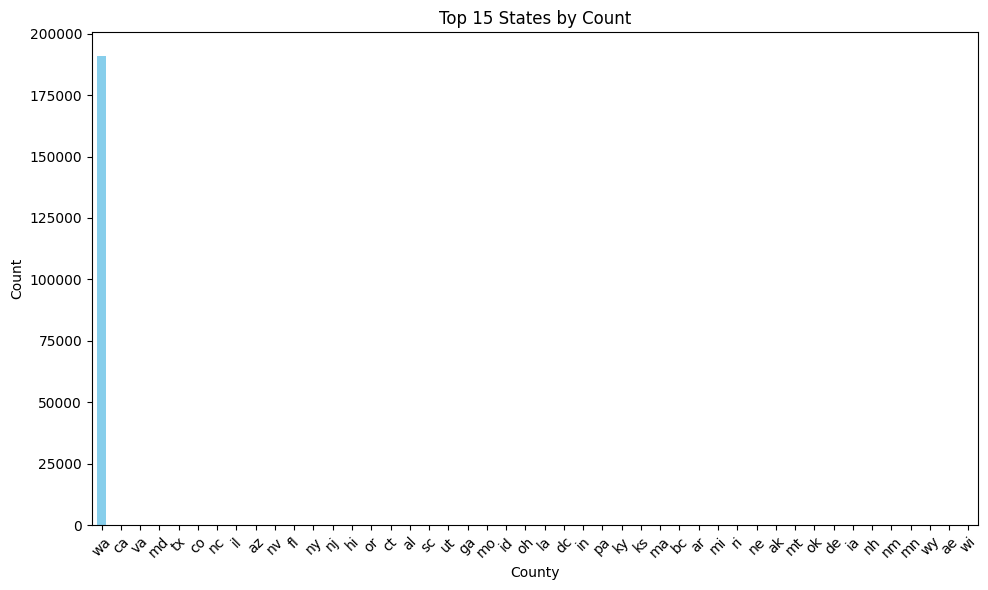

In [340]:

top_states = state_counts

plt.figure(figsize=(10, 6))
top_states.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} States by Count')
plt.xlabel('County')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As we can see the maximum datas are from WA and other states values are close to 0 so we are going to filter the data of WA and will drop the column


In [341]:
df = df[df['State'] == 'wa']

In [342]:
feature_to_drop = ['State']
df = df.drop(feature_to_drop, axis=1)

In [343]:
df.shape

(190993, 8)

Year:

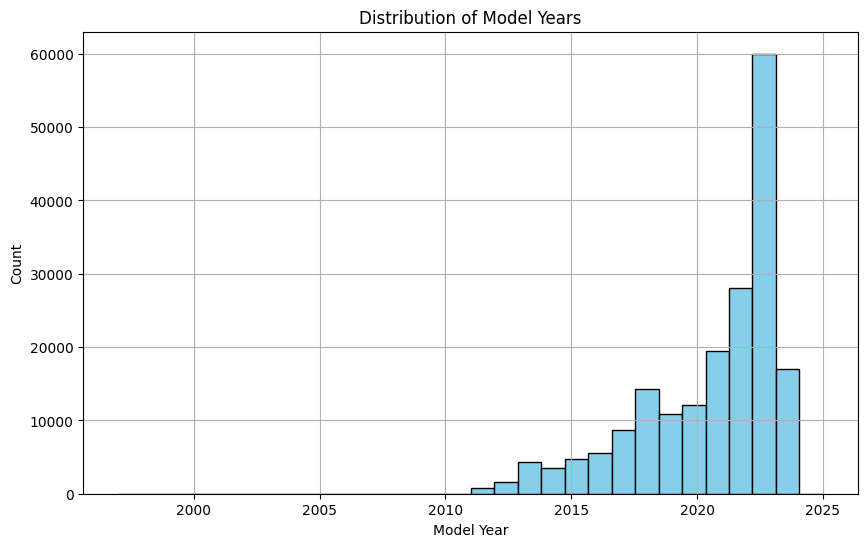

In [344]:
#Assuming df is your pandas DataFrame containing the dataset
plt.figure(figsize=(10, 6))
plt.hist(df['Model Year'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Model Years')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()


Make:

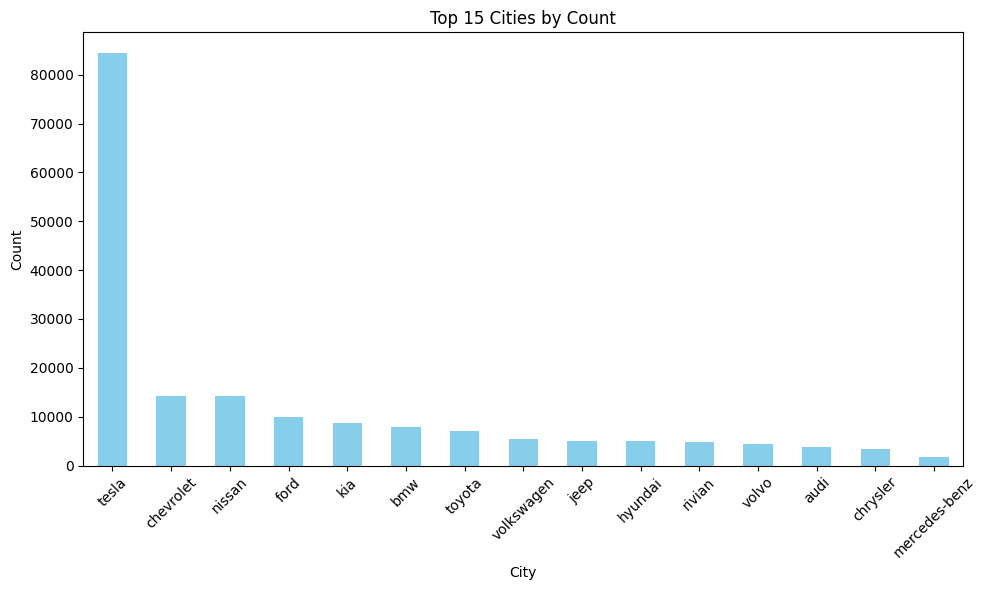

In [345]:
# Calculate counts of each vehicle make
make_counts = df['Make'].value_counts()
top_n = 15
top_make = make_counts.head(top_n)

plt.figure(figsize=(10, 6))
top_make.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Cities by Count')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

EV types

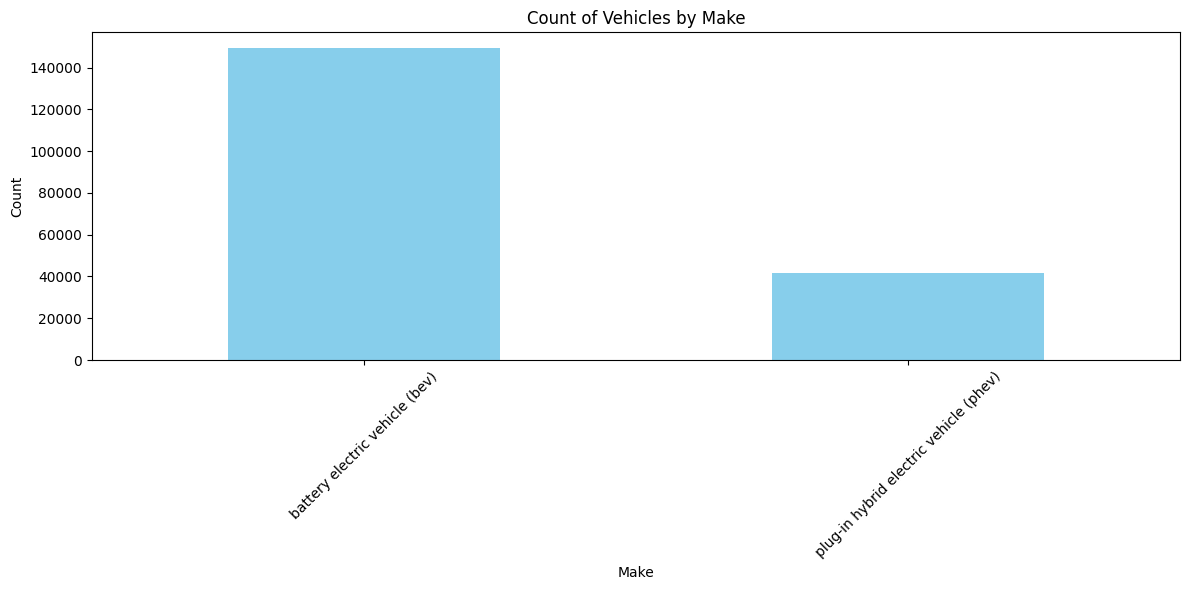

In [346]:
# Calculate counts of each vehicle make
evtype_counts = df['Electric Vehicle Type'].value_counts()

# Plotting using matplotlib
plt.figure(figsize=(12, 6))
evtype_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Vehicles by Make')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

CAFV:

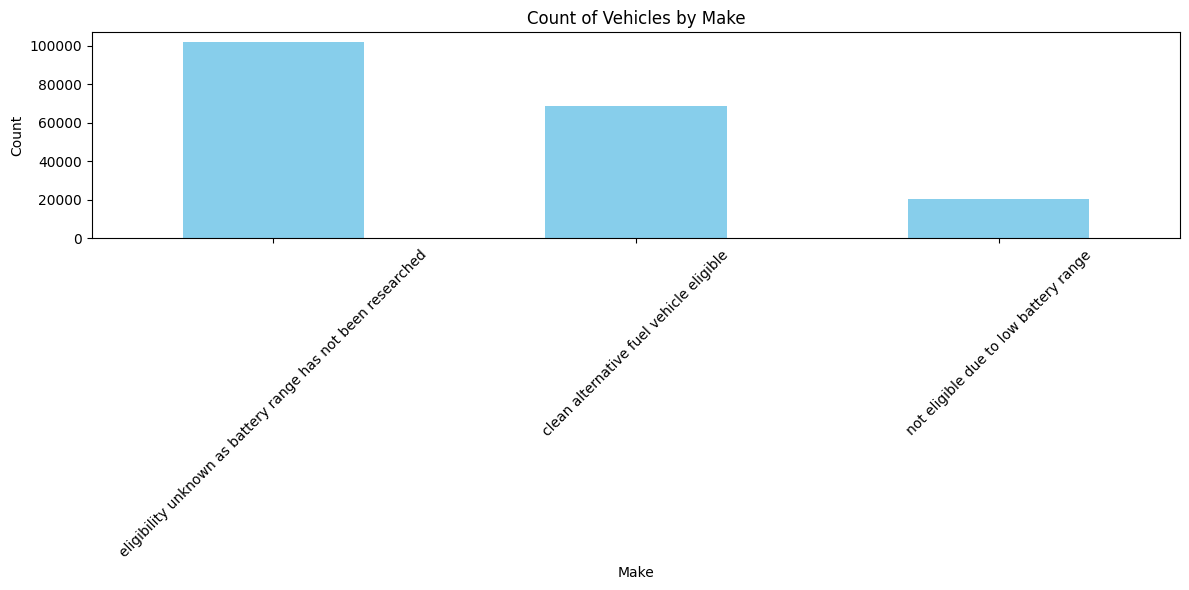

In [347]:

cafv_counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

# Plotting using matplotlib
plt.figure(figsize=(12, 6))
cafv_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Vehicles by Make')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

EU:

In [348]:

eu_counts = df['Electric Utility'].value_counts()

# Display the results
print("Unique statesunties and their counts:")
print(eu_counts)

Unique statesunties and their counts:
Electric Utility
puget sound energy inc||city of tacoma - (wa)                                                                 70546
puget sound energy inc                                                                                        38778
city of seattle - (wa)|city of tacoma - (wa)                                                                  33567
bonneville power administration||pud no 1 of clark county - (wa)                                              11067
bonneville power administration||city of tacoma - (wa)||peninsula light company                                8446
                                                                                                              ...  
city of seattle - (wa)                                                                                            2
bonneville power administration||city of tacoma - (wa)||alder mutual light co, inc|peninsula light company        2
bonneville power 

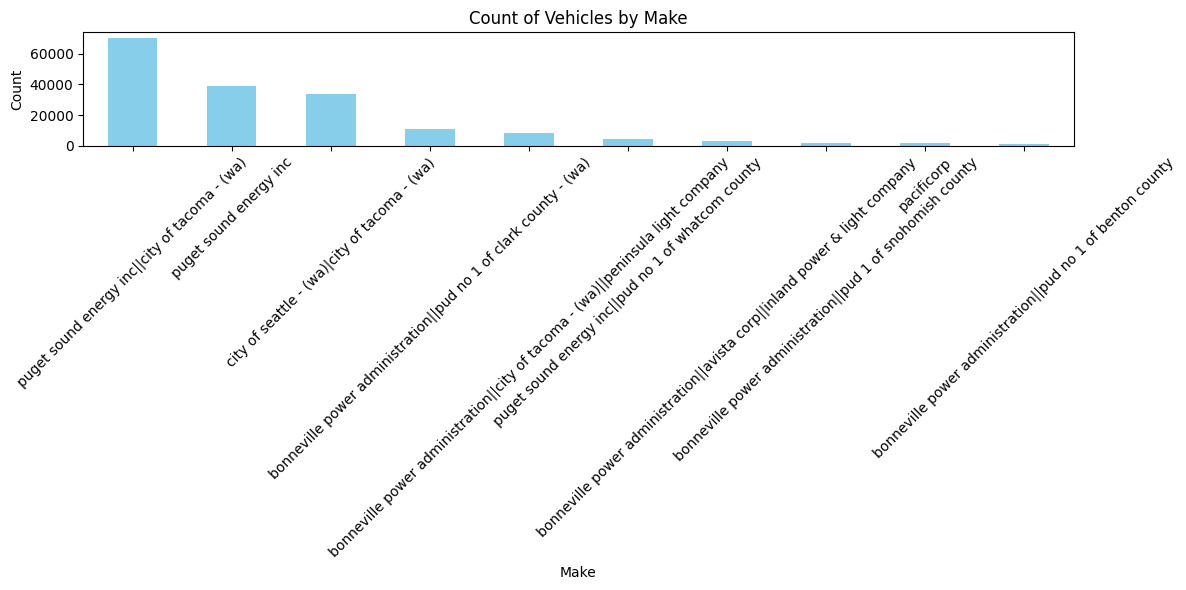

In [349]:
# Calculate counts of each vehicle make
eu_counts = df['Electric Utility'].value_counts()

top_n = 10  # Number of top counties to plot
top_eu = eu_counts.head(top_n)
# Plotting using matplotlib
plt.figure(figsize=(12, 6))
top_eu.plot(kind='bar', color='skyblue')
plt.title('Count of Vehicles by Make')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [350]:
pd.crosstab(df['Make'], df['Electric Vehicle Type'])

Electric Vehicle Type,battery electric vehicle (bev),plug-in hybrid electric vehicle (phev)
Make,,
acura,1,0
alfa romeo,0,56
audi,2408,1474
azure dynamics,8,0
bentley,0,3
bmw,2847,5135
cadillac,464,86
chevrolet,9505,4789
chrysler,0,3372


<Axes: xlabel='Make', ylabel='Model Year'>

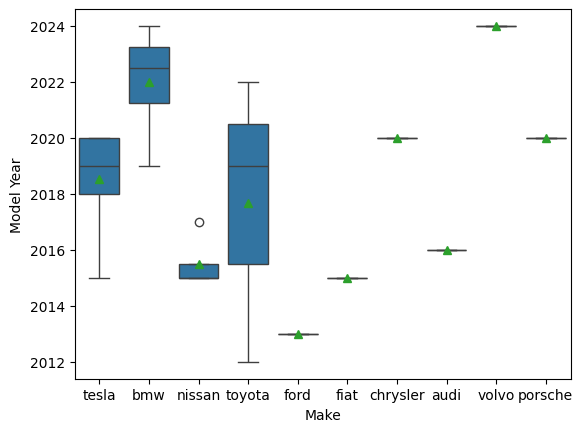

In [351]:
# Boxplots to see how Model Year distribution varies by Make
sns.boxplot(x = "Make", y = "Model Year", showmeans=True, data=df.head(30))

In [352]:
# prompt: convert year data in integer

# Assuming 'df' is your DataFrame and 'Model Year' is the column with year data
df['Model Year'] = df['Model Year'].astype(int)


Outliers and capping:

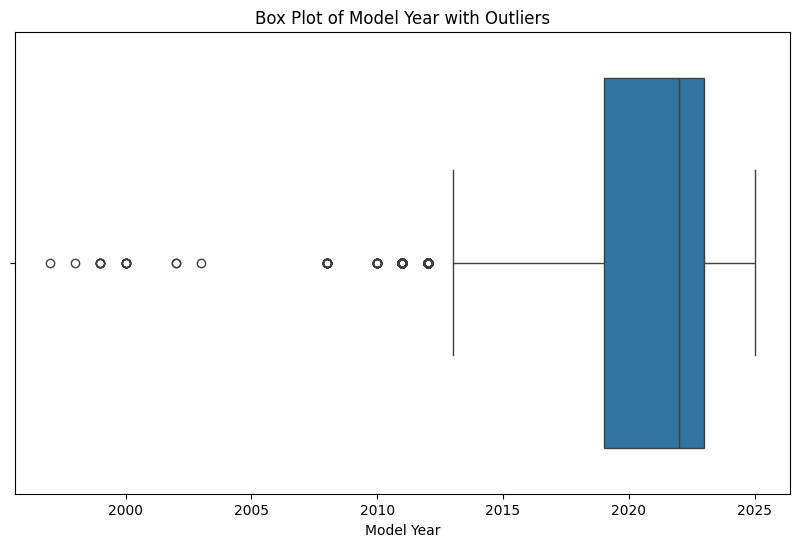

Outliers:
             County          City  Model Year       Make          Model  \
21           kitsap       poulsbo        2012     toyota  prius plug-in   
78           kitsap    silverdale        2012     nissan           leaf   
94      walla walla   walla walla        2011     nissan           leaf   
117          skagit           bow        2012     nissan           leaf   
120         stevens      colville        2011     nissan           leaf   
...             ...           ...         ...        ...            ...   
191163    snohomish       everett        2011     nissan           leaf   
191180      whatcom        lynden        2012  chevrolet           volt   
191200       skagit  mount vernon        2012  chevrolet           volt   
191293       benton     kennewick        2012     nissan           leaf   
191370      spokane       spokane        2012  chevrolet           volt   

                         Electric Vehicle Type  \
21      plug-in hybrid electric vehicle

In [353]:

# Calculate IQR for 'Model Year'
Q1 = df['Model Year'].quantile(0.25)
Q3 = df['Model Year'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Model Year'] < lower_bound) | (df['Model Year'] > upper_bound)]

# Visualize outliers using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Model Year'])
plt.title('Box Plot of Model Year with Outliers')
plt.xlabel('Model Year')
plt.show()

# Print outliers
print("Outliers:")
print(outliers)


In [354]:
df.shape

(190993, 8)

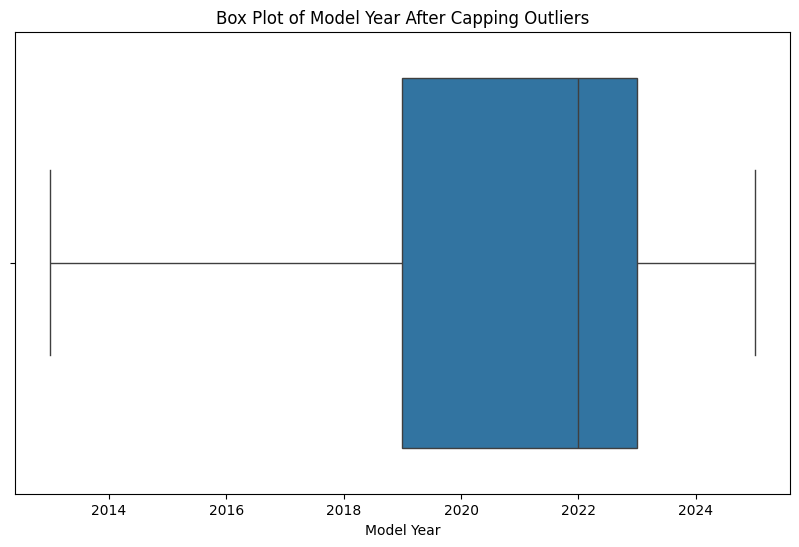

In [355]:
# prompt: cap outliers

import matplotlib.pyplot as plt
import numpy as np
# Cap outliers at the upper and lower bounds
df['Model Year'] = np.clip(df['Model Year'], lower_bound, upper_bound)

# Verify that outliers have been capped
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Model Year'])
plt.title('Box Plot of Model Year After Capping Outliers')
plt.xlabel('Model Year')
plt.show()


In [356]:
# Define thresholds for minimum counts
min_make_count = 100
min_city_count = 50
min_county_count = 30

# Filter the DataFrame based on count thresholds
df = df.groupby('Make').filter(lambda x: len(x) >= min_make_count)
df = df.groupby('City').filter(lambda x: len(x) >= min_city_count)
df = df.groupby('County').filter(lambda x: len(x) >= min_county_count)

# Print the shape of the filtered DataFrame
print("Shape of filtered DataFrame:", df.shape)


Shape of filtered DataFrame: (187663, 8)


Feature Engineering:

In [358]:
# prompt: encode county , city and make

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'County'
df['County_Encoded'] = label_encoder.fit_transform(df['County'])

# Encode 'City'
df['City_Encoded'] = label_encoder.fit_transform(df['City'])

# Encode 'Make'
df['Make_Encoded'] = label_encoder.fit_transform(df['Make'])

# Display the first few rows of the DataFrame to verify encoding
df.head()


,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility,County_encoded,County_Encoded,City_Encoded,Make_Encoded
0,king,seattle,2019,tesla,model s,battery electric vehicle (bev),clean alternative fuel vehicle eligible,city of seattle - (wa)|city of tacoma - (wa),12,12,152,28
2,king,kent,2015,nissan,leaf,battery electric vehicle (bev),clean alternative fuel vehicle eligible,puget sound energy inc||city of tacoma - (wa),12,12,83,22
3,snohomish,bothell,2015,tesla,model s,battery electric vehicle (bev),clean alternative fuel vehicle eligible,puget sound energy inc,23,23,15,28
4,yakima,yakima,2022,toyota,rav4 prime,plug-in hybrid electric vehicle (phev),clean alternative fuel vehicle eligible,pacificorp,31,31,193,29
5,king,redmond,2019,tesla,model 3,battery electric vehicle (bev),clean alternative fuel vehicle eligible,puget sound energy inc||city of tacoma - (wa),12,12,143,28


In [359]:
# Calculate the age of the vehicle (assuming current year is 2023)
df['Vehicle_Age'] = 2024 - df['Model Year']

# You can also create bins for vehicle age if needed
# For example, to create age categories:
bins = [0, 5, 10, 15, 20, float('inf')]
labels = ['0-5 years', '6-10 years', '11-15 years', '16-20 years', '20+ years']
df['Vehicle_Age_Category'] = pd.cut(df['Vehicle_Age'], bins=bins, labels=labels)

df.head()


,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Utility,County_encoded,County_Encoded,City_Encoded,Make_Encoded,Vehicle_Age,Vehicle_Age_Category
0,king,seattle,2019,tesla,model s,battery electric vehicle (bev),clean alternative fuel vehicle eligible,city of seattle - (wa)|city of tacoma - (wa),12,12,152,28,4,0-5 years
2,king,kent,2015,nissan,leaf,battery electric vehicle (bev),clean alternative fuel vehicle eligible,puget sound energy inc||city of tacoma - (wa),12,12,83,22,8,6-10 years
3,snohomish,bothell,2015,tesla,model s,battery electric vehicle (bev),clean alternative fuel vehicle eligible,puget sound energy inc,23,23,15,28,8,6-10 years
4,yakima,yakima,2022,toyota,rav4 prime,plug-in hybrid electric vehicle (phev),clean alternative fuel vehicle eligible,pacificorp,31,31,193,29,1,0-5 years
5,king,redmond,2019,tesla,model 3,battery electric vehicle (bev),clean alternative fuel vehicle eligible,puget sound energy inc||city of tacoma - (wa),12,12,143,28,4,0-5 years


In [360]:

# One-hot encode 'Electric Vehicle Type'
ev_type_dummies = pd.get_dummies(df['Electric Vehicle Type'], prefix='EV_Type')
df = pd.concat([df, ev_type_dummies], axis=1)

# One-hot encode 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'
cafv_dummies = pd.get_dummies(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'], prefix='CAFV')
df = pd.concat([df, cafv_dummies], axis=1)

# One-hot encode 'Electric Utility'
utility_dummies = pd.get_dummies(df['Electric Utility'], prefix='Utility')
df = pd.concat([df, utility_dummies], axis=1)

# Drop original categorical columns that have been one-hot encoded
df = df.drop(['Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Utility'], axis=1)

df.head()


,County,City,Model Year,Make,Model,County_encoded,County_Encoded,City_Encoded,Make_Encoded,Vehicle_Age,...,Utility_pacificorp,Utility_portland general electric co,Utility_pud no 1 of chelan county,Utility_pud no 1 of douglas county,Utility_pud no 1 of okanogan county,Utility_pud no 1 of whatcom county,Utility_pud no 2 of grant county,Utility_puget sound energy inc,Utility_puget sound energy inc||city of tacoma - (wa),Utility_puget sound energy inc||pud no 1 of whatcom county
0,king,seattle,2019,tesla,model s,12,12,152,28,4,...,False,False,False,False,False,False,False,False,False,False
2,king,kent,2015,nissan,leaf,12,12,83,22,8,...,False,False,False,False,False,False,False,False,True,False
3,snohomish,bothell,2015,tesla,model s,23,23,15,28,8,...,False,False,False,False,False,False,False,True,False,False
4,yakima,yakima,2022,toyota,rav4 prime,31,31,193,29,1,...,True,False,False,False,False,False,False,False,False,False
5,king,redmond,2019,tesla,model 3,12,12,143,28,4,...,False,False,False,False,False,False,False,False,True,False
